In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1e96032d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1e3ee2310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1e960fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1e3ee3ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1e3eec610>],
 'means': []}

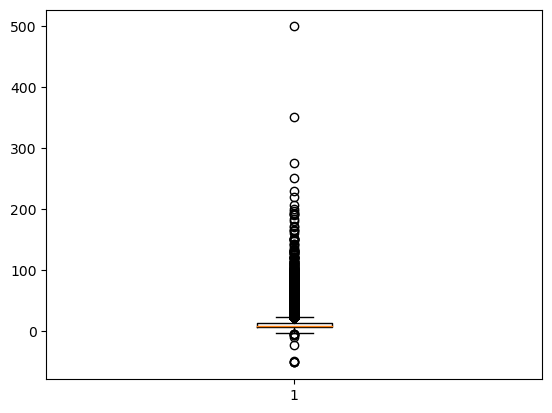

In [7]:
plt.boxplot(df["fare_amount"])

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
#lets cut out extreme boundary =>>>setting output display
low=df["fare_amount"].quantile(0.01)
high=df["fare_amount"].quantile(0.99)

df=df[(df['fare_amount']>low) & (df['fare_amount']<high)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1e3f96c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1e3fa43d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1e3f96010>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1e3fa5ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1e3fa6610>],
 'means': []}

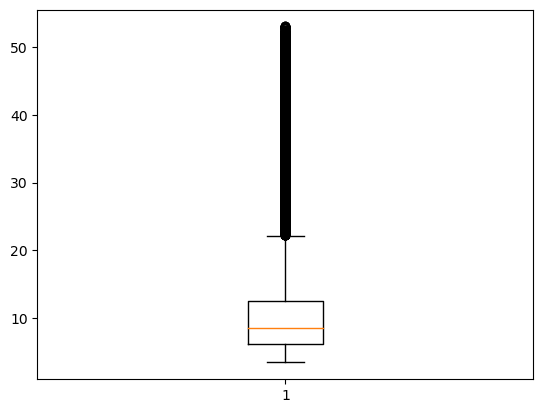

In [10]:
plt.boxplot(df["fare_amount"])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df.drop("fare_amount",axis=1)
y=df["fare_amount"]

In [13]:
#date_time valid conversion
x['pickup_datetime']=pd.to_numeric(pd.to_datetime(x['pickup_datetime']))

#finally selecting for "x" dataframe
x=x.loc[:,x.columns.str.contains('^Unnamed')]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=101)

#linear model

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
predict=model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
#finding mean squared error
rmse=np.sqrt(mean_squared_error(predict,y_test))
print(rmse)

8.317640164515383


#random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rmodel=RandomForestRegressor()
rmodel.fit(x_train,y_train)

In [ ]:
rpredict=rmodel.predict(x_test)

In [ ]:
rrmse=np.sqrt(mean_squared_error(rpredict,y_test))
print(rrmse)